In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn
#cleaned
eng_path = "../../data/team_player/cleaned/EPL.csv"
it_path = "../../data/team_player/cleaned/SerieA.csv"
spain_path = "../../data/team_player/cleaned/Liga.csv"

eng = "../../data/transfers/cleaned/england_joined.csv"
spain = "../../data/transfers/cleaned/spain_joined.csv"
it = "../../data/transfers/cleaned/italy_joined.csv"


#read the cleaned data
eng1 = pd.read_csv(eng)
spain1 = pd.read_csv(spain)
it1 = pd.read_csv(it)

eng_df = pd.read_csv(eng_path)
it_df = pd.read_csv(it_path)
spain_df = pd.read_csv(spain_path)

#joins df's
first_join = pd.concat([eng_df,it_df,spain_df])
second_join = pd.concat([eng1,it1,spain1])


In [3]:
first_join[first_join["Teams"].str.contains("Espa")].head()

,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
19,20,2019,RCD Espanyol,25,27,59,25.03,179.27,73.23,72.53,6696666,18400
27,8,2018,RCD Espanyol,53,28,22,25.30,179.70,74.07,71.50,5032166,16567
52,13,2017,RCD Espanyol,49,20,16,25.83,181.30,75.47,74.70,6871666,25000
67,8,2016,RCD Espanyol,56,28,24,25.96,181.39,75.54,74.07,5338392,10036
92,13,2015,RCD Espanyol,43,22,28,24.07,181.62,75.52,70.86,2964655,28655


In [101]:
second_join = second_join.replace("Deportivo de La Coruña","RCD La Coruña")
second_join = second_join.replace("Parma Calcio 1913","Parma")
second_join = second_join.replace("Celta de Vigo","RC Celta Vigo")
second_join = second_join.replace("Bologna 1909","Bologna")
second_join = second_join.replace("'Sassuolo","Sassuolo Calcio")
second_join = second_join.replace("Brescia Calcio","Brescia")
second_join = second_join.replace("Inter Milan","FC Internazionale Milano")
second_join = second_join.replace("Athletic Bilbao","Athletic Club Bilbao")
second_join = second_join.replace("Real Betis Balompié","Real Betis")
second_join = second_join.replace("RCD Espanyol Barcelona","RCD Espanyol")

In [102]:
final_df = first_join.merge(second_join, on=["Year","Teams"],how='inner')

In [103]:
final_df.drop(['Unnamed: 0','avg player value (EU)_y', 'Ranking_y','avg player wage_y'], axis=1, inplace=True)

In [4]:
final_df = final_df.rename(columns={"Ranking_x":"Ranking","avg player value (EU)_x": "avg player value (EU)",
                "avg player wage_x":"avg player wage"})
final_df=final_df.fillna(0)

path = "../../data/team_player/cleaned/model_data.csv"
final_df.to_csv(path, index=False)

NameError: name 'final_df' is not defined

In [119]:
for column in list(final_df.columns):
    if column == "Teams":
        continue
    r = stats.pearsonr(final_df["Ranking"],final_df[column])[0]
    print(f"Correlation between Ranking and {column} is {round(r,3)}, r-squared is {round(r**2,3)}")

Correlation between Ranking and Ranking is 1.0, r-squared is 1.0
Correlation between Ranking and Year is 0.048, r-squared is 0.002
Correlation between Ranking and Points is -0.918, r-squared is 0.843
Correlation between Ranking and Goals+ is -0.562, r-squared is 0.316
Correlation between Ranking and Goals- is 0.439, r-squared is 0.193
Correlation between Ranking and avg age is 0.072, r-squared is 0.005
Correlation between Ranking and avg heights (cm) is -0.025, r-squared is 0.001
Correlation between Ranking and avg weight (kg) is -0.026, r-squared is 0.001
Correlation between Ranking and avg player rating is -0.632, r-squared is 0.399
Correlation between Ranking and avg player value (EU) is -0.547, r-squared is 0.299
Correlation between Ranking and avg player wage is -0.515, r-squared is 0.265
Correlation between Ranking and Transfer Spend (Euros) is -0.513, r-squared is 0.263
Correlation between Ranking and MA is -0.632, r-squared is 0.399


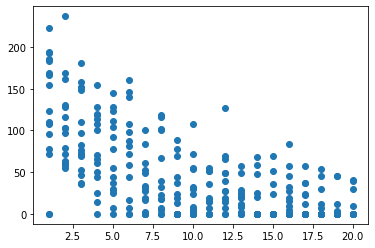

In [121]:
x = final_df["Ranking"]
y = final_df["MA"]
plt.scatter(x,y)
